### Caculate PI using Monte Carlo

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('../') 
import AdvAppStatFunctions as aas

# setting for plotting
import seaborn as sns
plt.style.use('seaborn-white')
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=12

In [15]:
N = 100000
R = 5.2

def PI(R,N):
    'Random number with fixed seed'
    r = np.random
    
    'Generate random numbers'
    x_ran = r.uniform(0, R, N)
    y_ran = r.uniform(0, R, N)
    
    x_accept = []
    y_accept = []
    
    x_reject = []
    y_reject = []
    
    for x, y in zip(x_ran, y_ran):
        if x**2 + y**2 <= R**2:
            x_accept.append(x)
            y_accept.append(y)
        
        else:
            x_reject.append(x)
            y_reject.append(y)
        
    e = len(x_accept) / N
        
    return x_accept, y_accept, x_reject, y_reject, e

Efficiency =  0.78588 %


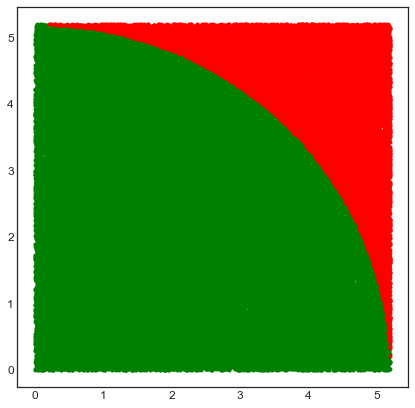

In [16]:
x_accept, y_accept, x_reject, y_reject, e = PI(R, N)

plt.figure(figsize=(7,7))
plt.plot(x_accept, y_accept, '.', color = 'green')
plt.plot(x_reject, y_reject, '.', color = 'red')
print(f'Efficiency =  {e} %');

In [17]:
A_box = max(y_reject)*max(x_reject) 
A_circle = e * A_box * 4 # efficiency times area of box times four

print(f'Circle area calculated numerically= ', A_circle, '\nCircle area calculated analytically', np.pi*R**2)

pi_num = A_circle / R**2

print('\nPi numerically', pi_num)

Circle area calculated numerically=  84.99912824918042 
Circle area calculated analytically 84.94866535306801

Pi numerically 3.143458884954897


In [18]:
N = 100

A_circle_all = []

for i in range(1000):
    x_accept, y_accept, x_reject, y_reject, e = PI(R, N)
    A_box = max(y_reject)*max(x_reject) 
    A_circle = e * A_box * 4 
    A_circle_all.append(A_circle)

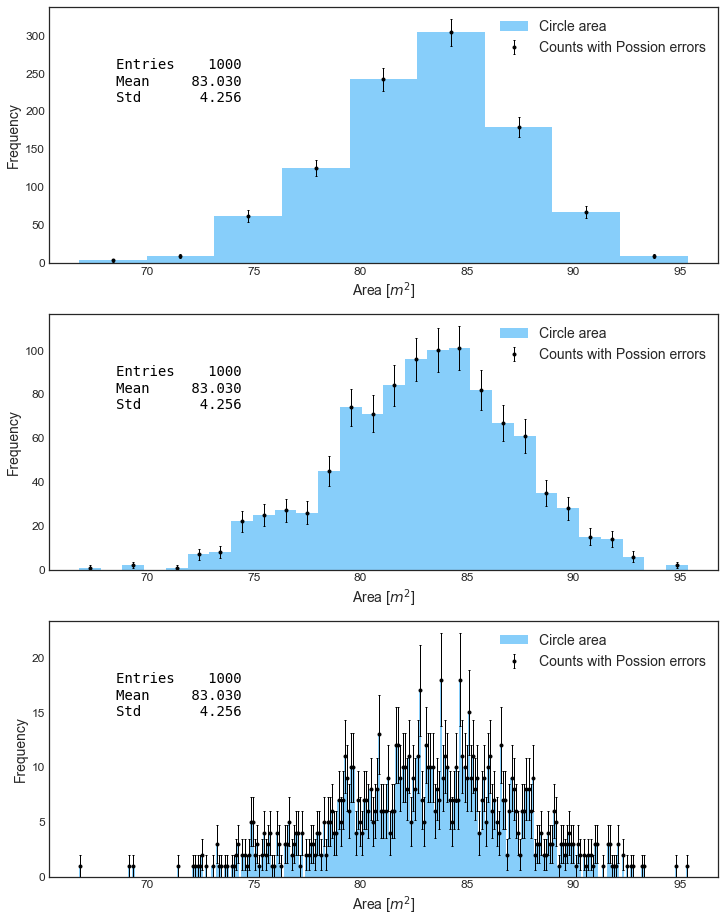

In [19]:
xmin = min(A_circle_all)
xmax = max(A_circle_all)
w1, w2, w3 = 3, 1, 0.1
N_bins1 = int((xmax-xmin) / w1)
N_bins2 = int((xmax-xmin) / w2)
N_bins3 = int((xmax-xmin) / w3)

fig, (ax1, ax2, ax3) = plt.subplots(figsize=(12,16), nrows=3)
aas.plot_hist(A_circle_all, xmin, xmax, N_bins1, ax1, xlabel='Area [$m^2$]', histlabel='Circle area', d_xy = [0.10, 0.80])
aas.plot_hist(A_circle_all, xmin, xmax, N_bins2, ax2, xlabel='Area [$m^2$]', histlabel='Circle area', d_xy = [0.10, 0.80])
aas.plot_hist(A_circle_all, xmin, xmax, N_bins3, ax3, xlabel='Area [$m^2$]', histlabel='Circle area', d_xy = [0.10, 0.80])

In [14]:
N_bins3

286